## This is an introductory assignment to learn the following:
## 1. How to generate data
## 2. How to artificially generate noise
## 3. How to inject the noise in the data
## 4. How to filter the data

## The equation below is what this assignment is on
## $$ I_{sp} = \frac {T}{g \frac{dm_p}{dt}} $$

In [171]:
# Library imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from astropy.constants import g0 # Acceleration due to gravity
from scipy.signal import savgol_filter
from scipy import signal

## 1. Generating data

In [172]:
time = np.linspace(1, 100)

In [173]:
a, b, c = 3, 2, 10
thrust_equation = a * np.log(time) + b * time + c

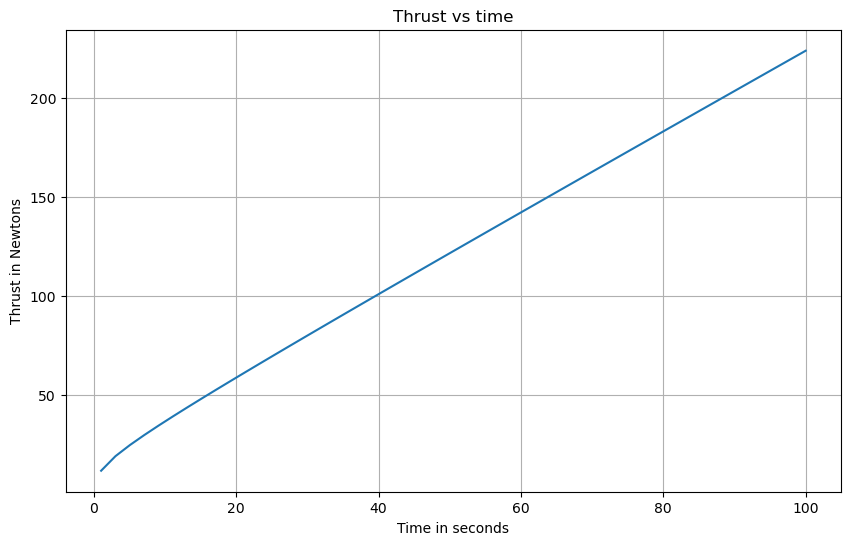

In [174]:
# Data without noise
plt.figure(figsize=(10, 6))
plt.xlabel('Time in seconds')
plt.ylabel('Thrust in Newtons')
plt.title('Thrust vs time')
plt.plot(time, thrust_equation)
plt.grid(True)
plt.show()

## 2. Adding noise to the data
## $$ T = v_p \cdot \frac{dm_p}{dt} $$

In [175]:
np.random.seed(0) # Ensures random_state is the same every time

exhaust_velocity = 4500

thrust_equation = a * np.log(time) + b * time + c + np.random.normal(0, 20, time.size)

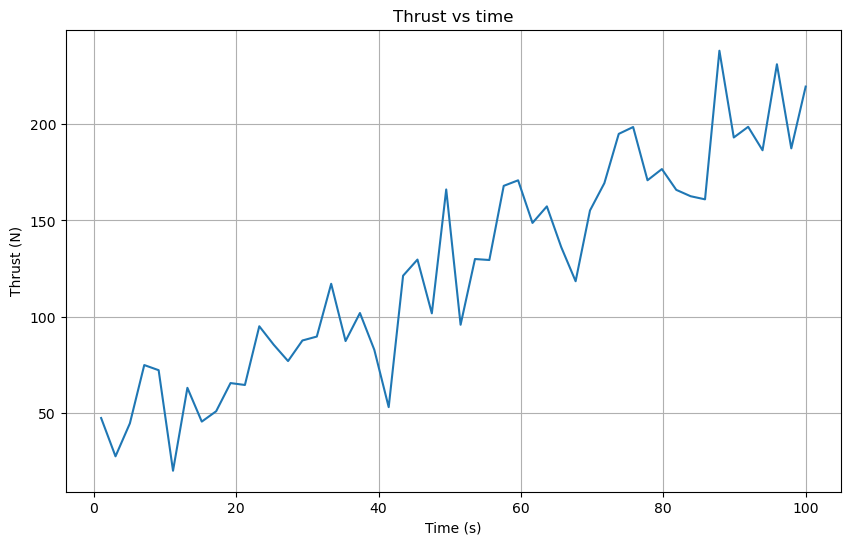

In [176]:
# Data with noise
plt.figure(figsize=(10, 6))
plt.xlabel('Time (s)')
plt.ylabel('Thrust (N)')
plt.title('Thrust vs time')
plt.plot(time, thrust_equation)
plt.grid(True)
plt.show()

## Generating data for weight flow rate of fuel
$$ I_{sp} = \frac {T}{g \frac{dm_p}{dt}} $$

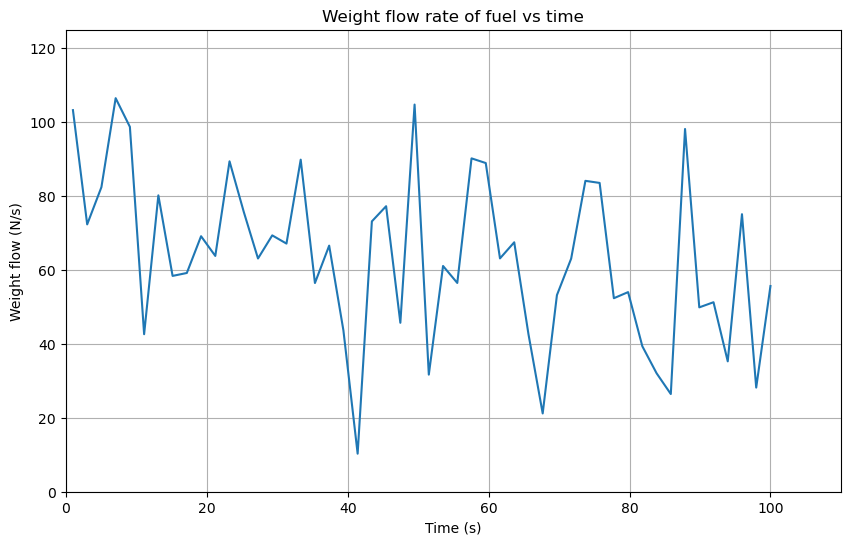

In [177]:
np.random.seed(0) # Ensures random_state is the same every time

mass = time ** (-1/2) + np.random.normal(6, 2, time.size)
weight_flow = mass * g0

plt.figure(figsize=(10, 6))
plt.xlim(0, 110)
plt.ylim(0, 125)
plt.xlabel('Time (s)')
plt.ylabel('Weight flow (N/s)')
plt.title('Weight flow rate of fuel vs time')
plt.plot(time, weight_flow)
plt.grid(True)
plt.show()

## Specific Impulse without filter

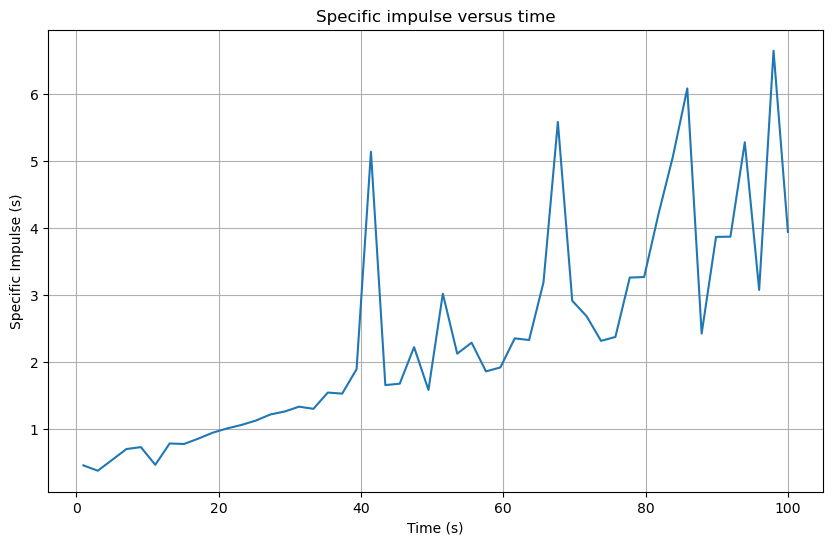

In [178]:
# Now plotting specific impulse versus time
specific_impulse = thrust_equation / weight_flow

plt.figure(figsize=(10, 6))
plt.xlabel('Time (s)')
plt.ylabel('Specific Impulse (s)')
plt.title('Specific impulse versus time')
plt.plot(time, specific_impulse)
plt.grid(True)
plt.show()

## Specific impulse versus time with filter (Savitzky-Golay filter)

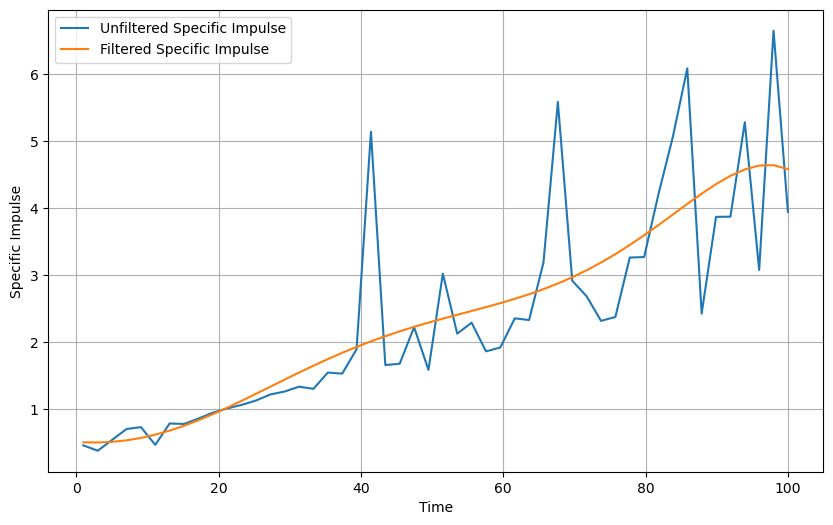

In [179]:
window_length = 50
polyorder = 6
filtered_specific_impulse = savgol_filter(specific_impulse, window_length, polyorder)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(time, specific_impulse, label='Unfiltered Specific Impulse')
plt.plot(time, filtered_specific_impulse, label='Filtered Specific Impulse')

plt.xlabel('Time')
plt.ylabel('Specific Impulse')

plt.legend()

plt.grid(True)
plt.show()


## Specific impulse versus time with filter (Lowpass filter)

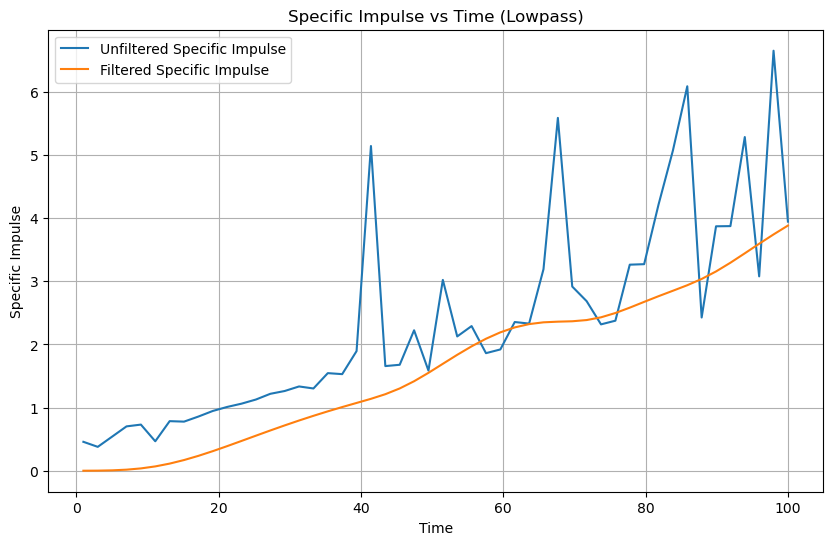

In [180]:
b, a = signal.butter(4, 0.1, 'low')
filtered_specific_impulse = signal.lfilter(b, a, specific_impulse)

plt.figure(figsize=(10, 6))

plt.title('Specific Impulse vs Time (Lowpass)')

plt.plot(time, specific_impulse, label='Unfiltered Specific Impulse')
plt.plot(time, filtered_specific_impulse, label='Filtered Specific Impulse')

plt.xlabel('Time')
plt.ylabel('Specific Impulse')

plt.legend()

plt.grid(True)
plt.show()